# Зачетная работа 
*Коробейников А.П.*

## 4. Численное интегрирование. Светимость черного тела
Согласно *формуле Планка* спектральная плотность энергетической светимости 
абсолютно чёрного тела
равна
$$
\varphi(\lambda, T) =\frac{2 \pi h c^2}{\lambda^5 \left(e^{\frac{h c}{\lambda k T}} - 1\right)},
$$
где
$h = 6.6261 \times 10^{-34}$ (постоянная Планка, $\mbox{Вт}\cdot\mbox{с}^2$);
$k = 1.3806 \times 10^{-23}$ (постоянная Больцмана, Вт с/K);
$c = 2.9979 \times 10^{8}$   (скорость света, м/с);
$T = 5778$ (эффективная температура Солнца, К).
Формула Планка позволяет узнать, какую энергию излучает единица поверхности тела с эффективной температурой $T$
за единицу времени на каждой единице длины волны $\lambda$.
Для определения энергии, излучаемой телом в определенном диапазоне частот
$\lambda_1$, $\lambda_2$, необходио найти интеграл
$$
R(\lambda_1,\lambda_2,T) = \int_{\lambda_1}^{\lambda_2} \varphi(\lambda, T) d\lambda.
$$
Применим эти знания к Солнцу.
Нас не должно удивлять, что формулу для абсолютно черного тела мы
применяем к Солцну. Среди тел нашей системы Солнце всех лучше
удовлетворяет свойствам абсолютно черного тела.

Чтобы узнать полную энергетическую светимость Солнца надо умножить
$R(\lambda_1,\lambda_2,T)$ на площадь поверхности Солнца.

Пригодится его радиус: $R = 6.957\times 10^8$ (м)

 1. Постройте для Солнца график зависимости $\varphi(\lambda, T)$ от $\lambda$.

 2. С помощью численного интегрирования найдите светимость Солнца
на видимой области длин волн, т.\,е. для $\lambda$ в диапазоне от 
$\lambda_1 = 3.5\times 10^{-7}$ до $\lambda_2 = 7\times 10^{-7}$.

 3. Найдите также светимость Солнца для всех длин волн: от $0$ до $\infty$
(вам придется брать несобственный интеграл).

 4. Этот интеграл, оказывается, можно взять аналитически
и энергетическая светимость равна $R^* = \sigma T^4$,
где 
$$
\sigma = \frac{8\pi^5 k^4}{15 c^3 h^3}
$$
Это так называемый закон *Стефана–Больцмана*.
Константа $\sigma$ называется константой Стефана–Больцмана.
Чтобы узнать полную энергетическую светимость не забудьте $R^*$
умножить на площадь поверхности Солнца. Сравните полученный результат с результатом из предыдущего пункта.

 5. Найдите так называемую *солнечную постоянную* –
мощность солнечного излучения, падающего перпендикулярно на единичную площадку
на высоте верхней границы атмосферы Земли.
Вам пригодится расстояние от Солна до Земли: $149.6\times 10^9$ м

 6. Попробуйте найти вычисленные вами величины в литературе и сравните ваши значения с найденными.
 
 7. Сделайте выводы.

# 1 График

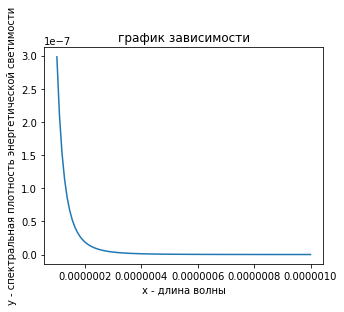

In [335]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
plt.figure(figsize = (5,4))
T = 5778
c = 2.9979*10**8
h = 6.6261*10**-34
k = 1.3806*10**-23
x = np.linspace(100*10**-9,1000*10**-9,100)
y = (2*np.pi*h*c*c)/(x**5*(np.e**(h*c)/(x*k*T) - 1))
plt.title('график зависимости')
plt.xlabel('x - длина волны')
plt.ylabel('y - спектральная плотность энергетической светимости')
plt.plot (x,y)
pass

# 2 Светимость Солнца на видимой области длин волн

In [308]:
a = 3.5 * 10**(-7)
b = 7 * 10**(-7)
n = 1000
hh = (b - a)/n
x = np.arange(a + hh/2, b, hh)
y = (2*np.pi*h*c*c)/(x**5*(np.e**(h*c)/(x*k*T) - 1))
I_rect = hh*sum(y)
I_rect

2.0304858620540002e-16

In [260]:
I_trapz = integrate.trapz(y, x)
I_trapz

1.9940563833570903e-16

In [261]:
I_simps = integrate.simps(y, x)
I_simps

1.9938429993249287e-16

In [315]:
Rs = 6.957 * 10**8  #Радиус Солнца
Lv = I_simps * 4 * np.pi * Rs**2
Lv #светимость Солнца на видимой области длин волн (Вт)

1212.6761283350654

# 3 Светимость Солнца для всех длин волн: от 0 до  ∞

In [290]:
import scipy
def integrand (x):
  return (2*np.pi*h*c*c)/(x**5*(np.e**(h*c)/(x*k*T) - 1))

i, abserr = scipy.integrate.quad(integrand, 0, np.inf)
i, abserr

(8.202259989279213e-27, 1.61801232989049e-26)

In [293]:
ans = i *4*np.pi*Rs**2
ans

4.98870015882116e-08

# 4 Закон Стефана-Больцмана

Найдем светимость солнца через закон *Стефана–Больцмана*

In [313]:
Rs = 6.957 * 10**8  #Радиус Солнца
const_st_b = 2*(np.pi**5)*(k**4)/(15*(c**2)*(h**3)) #постоянная Стефана-Больцмана (Вт/(м^2 * K^4))
R = const_st_b * T**4 #(Вт/м^2)
L = R*4*np.pi*Rs**2  #(Вт)
L

3.843397958410175e+26

# 5 Солнечная постоянная

Считая Солнце чёрным телом, оценим энергию, приходящую от него на единичную площадку в окрестности Земли.
Расстояние r между Землёй и Солнцем примем равным одной астрономической единице:

In [302]:
r = 149.6 * 10**9  #(м)

In [ ]:
Разделив светимость Солнца на площадь сферы радиуса r, получим так называемую солнечную постоянную, 
то есть, поток всего излучения, падающий вне атмосферы Земли на площадку единичной площади при среднем 
расстоянии Земли от Солнца:

In [307]:
E = L/(4*np.pi*r**2) #(Вт/м^2)
E

1366.6027931665326